<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


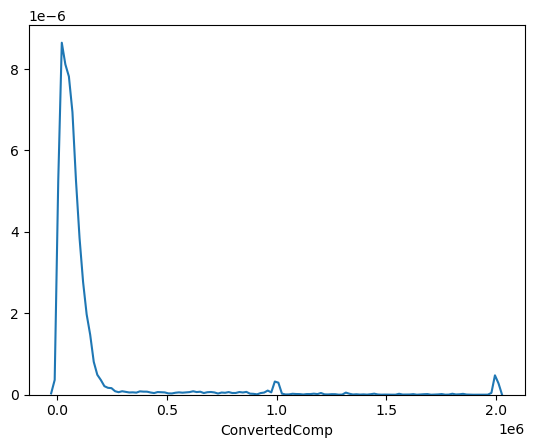

In [4]:
# your code goes here
sns.distplot(df['ConvertedComp'], 'ConvertedComp', hist = False)
plt.show()

Plot the histogram for the column `ConvertedComp`.


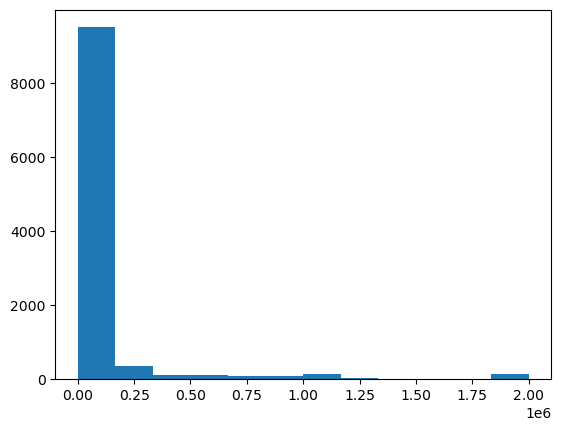

In [13]:
# your code goes here
data= df[['ConvertedComp']]

plt.hist(data, bins=12)
plt.show()

What is the median of the column `ConvertedComp`?


In [12]:
# your code goes here
df['ConvertedComp'].median()

57745.0

In [66]:
df['Age'].median()

29.0

How many responders identified themselves only as a **Man**?


In [26]:
# your code goes here
(df['Gender']=='Man').sum()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [32]:
# your code goes here
df[df['Gender']=='Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [40]:
# your code goes here
age_number_summary=df['Age'].describe()
print(age_number_summary[['min', '25%', '50%', '75%', 'max']])

min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


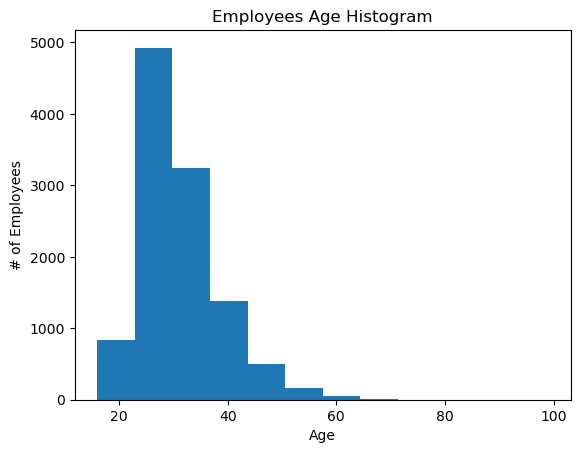

In [43]:
# your code goes here
data= df[['Age']]

plt.hist(data, bins=12)
plt.title('Employees Age Histogram')
plt.xlabel('Age')
plt.ylabel('# of Employees')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


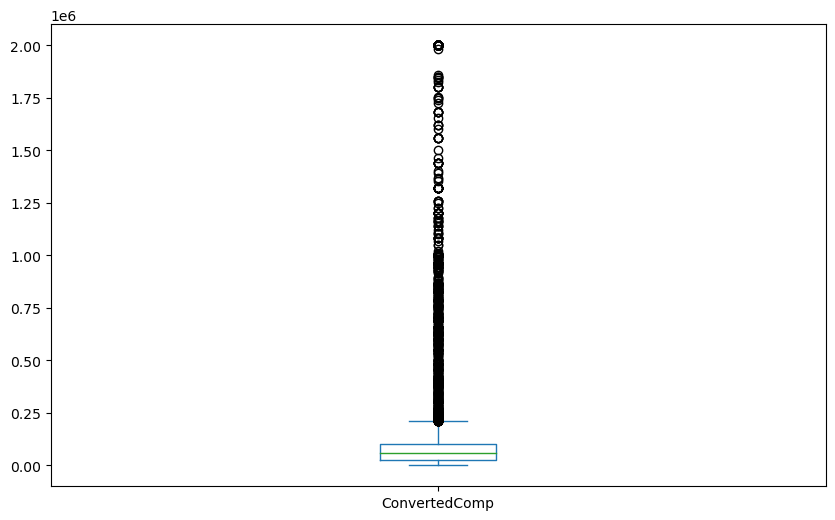

In [52]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(10,6))
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [56]:
import numpy as np

In [59]:
# your code goes here
q1 = np.percentile(df['ConvertedComp'].dropna(), 25)
q3 = np.percentile(df['ConvertedComp'].dropna(), 75)

iqr = q3 - q1
print('The Inter Quartile Range is -->', iqr)

The Inter Quartile Range is --> 73132.0


Find out the upper and lower bounds.


In [60]:
# your code goes here
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [61]:
# your code goes here
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]
print('The Number of Outliers is -->', num_outliers)

The Number of Outliers is --> 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [64]:
# your code goes here
df_without_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
df_without_outliers.shape

(9703, 85)

In [68]:
df_without_outliers['ConvertedComp'].median()

52704.0

In [69]:
df_without_outliers['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [65]:
# your code goes here
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
